<a href="https://colab.research.google.com/github/azizdhaoui/PCA-/blob/main/image_compression_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Opening photo
Standardizing matrix
Calculating first 50-PC
[0.23790312 0.39751862 0.49277281 0.57120582 0.64161468 0.68752128
 0.72743704 0.75123875 0.77329965 0.78940557 0.80339947 0.81615902
 0.82803059 0.83952244 0.84982339 0.85875118 0.86661547 0.87372365
 0.88030068 0.88618439 0.89172466 0.89631619 0.90074124 0.90457333
 0.90819578 0.91168353 0.9148194  0.9177104  0.92044571 0.92299551
 0.92548154 0.92789015 0.93021396 0.93239738 0.93449039 0.93647958
 0.93839878 0.94024276 0.94199451 0.94364575 0.94527395 0.94680391
 0.94828783 0.94967994 0.95102818 0.95226722 0.9534855  0.95463843
 0.95576358 0.9568519 ]
Visualizing data of image


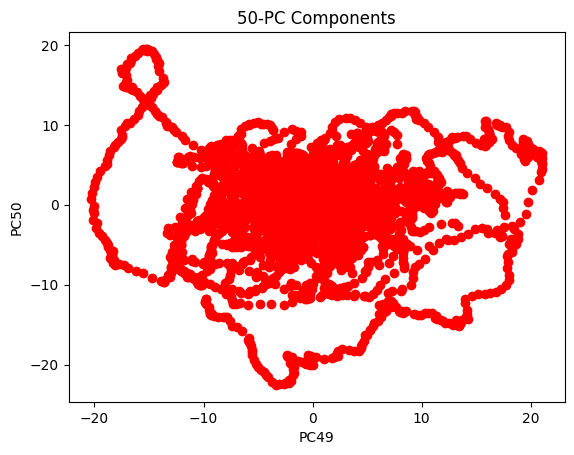

Producing images


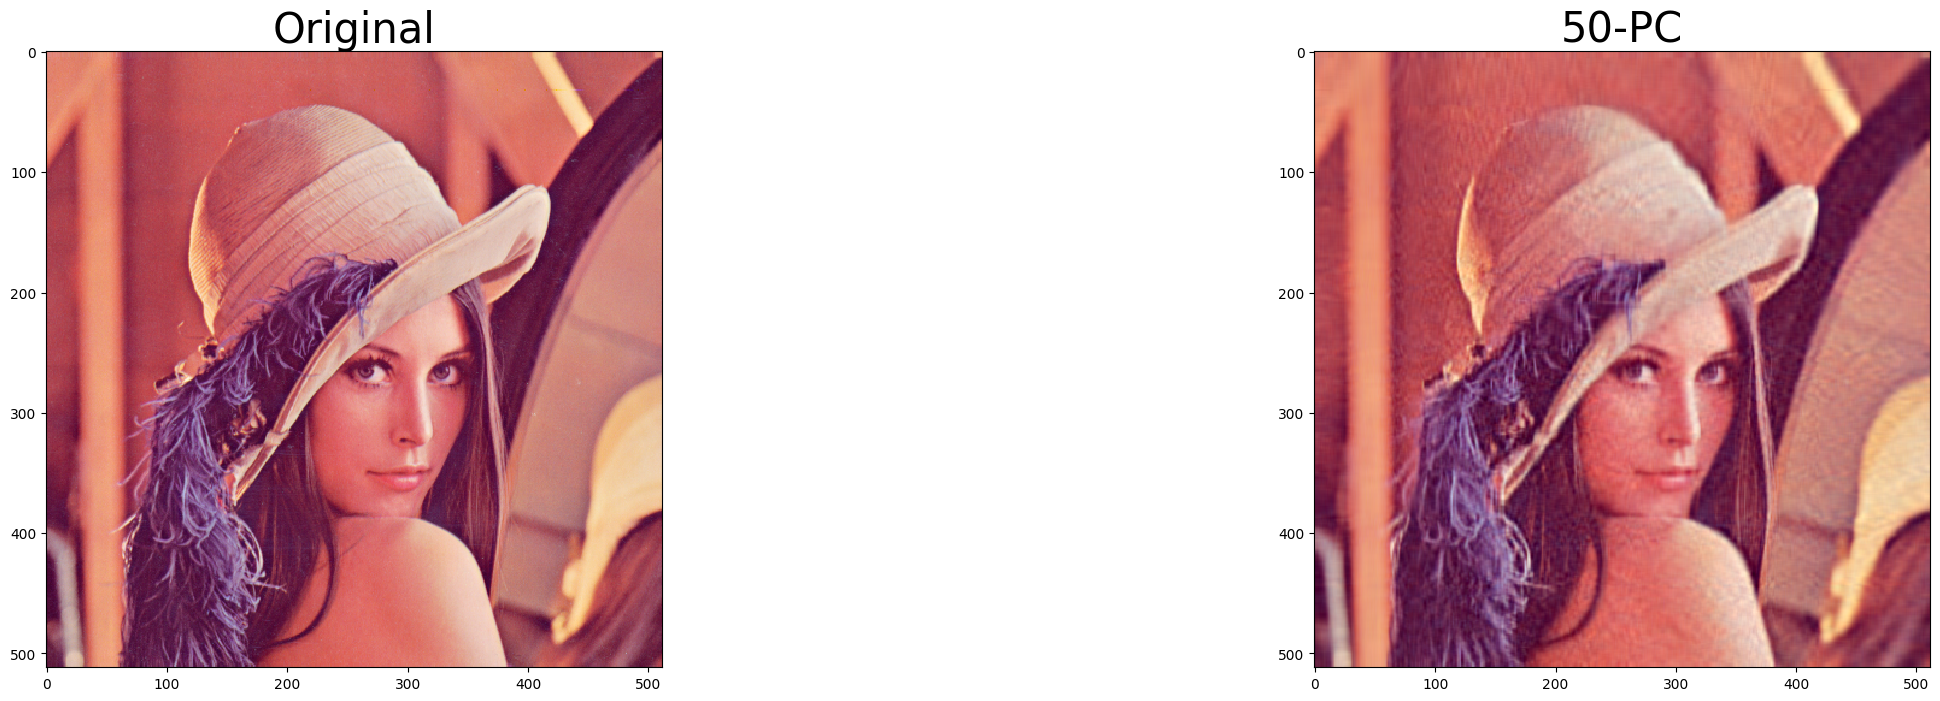

In [6]:
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def print_single_pca(ncomp, matrix, title):
    plt.title(title)

    for i in range(0, ncomp, 2):  # Step size of 2, to plot pairs of components
        plt.scatter(matrix[:, i], matrix[:, i + 1], c='r')
        plt.xlabel(f'PC{i + 1}')
        plt.ylabel(f'PC{i + 2}')


def main():
    print('Opening photo')
    img_data = np.asarray(Image.open('lena512color.tiff'))
    x = img_data.reshape(512, -1)

    # Standardizing matrix: mean = 0 and variance = 1
    print('Standardizing matrix')
    mean = np.mean(x)
    std = np.std(x)
    x_standardized = (x - mean) / std

    # Using PCA to extract principal components
    n_comp = 50
    print('Calculating first 50-PC')
    pca = PCA(n_comp)
    x_t = pca.fit_transform(x_standardized)
    print(pca.explained_variance_ratio_.cumsum())

    # Visualizing data in 50-PC space
    print('Visualizing data of image')
    plt.figure('Lenna data')
    print_single_pca(n_comp, x_t, '50-PC Components')
    plt.show()
    plt.close()

    # Producing original and PCA-reconstructed images
    print('Producing images')
    plt.figure('Lenna photos', figsize=(30, 8))

    # Original image
    plt.subplot(1, 2, 1)
    original = np.reshape(x, (512, 512, -1)).astype(int)
    plt.imshow(original, interpolation='nearest')
    plt.title('Original', fontsize=30)

    # Reconstructed image using PCA components
    plt.subplot(1, 2, 2)
    approx = pca.inverse_transform(x_t)
    approx = (approx * std) + mean  # De-standardizing the approximated data
    img_components = np.reshape(approx, (512, 512, -1)).astype(int)
    plt.imshow(img_components, interpolation='nearest')
    plt.title(f'{n_comp}-PC', fontsize=30)

    plt.show()
    plt.close()


if __name__ == "__main__":
    main()
